In [1]:
import pandas as pd

In [31]:
repayment = pd.read_csv('Downloads/Python Case  studies unsolved/Case Study 2 - Credit Card Case Study/Repayment.csv')
spend = pd.read_csv('Downloads/Python Case  studies unsolved/Case Study 2 - Credit Card Case Study/spend.csv')
customer= pd.read_csv('Downloads/Python Case  studies unsolved/Case Study 2 - Credit Card Case Study/Customer Acqusition.csv')
credit_data = pd.read_excel('Downloads/Python Case  studies unsolved/Case Study 2 - Credit Card Case Study/Credit Card Data.xlsx')

In [32]:
repayment.head(5)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [4]:
spend.head(5)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [5]:
customer.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [6]:
credit_data.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,34.012349,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,50.497350,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,35.855817,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,27.356821,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,22.021249,BANGALORE,Platimum,10002,C5,Normal Salary


In [7]:
repayment.dtypes

SL No:        float64
Customer       object
Month          object
Amount        float64
Unnamed: 4    float64
dtype: object

####  a. In case age is less than 18, replace it with mean of age values.

In [8]:

for i in range(len(customer['Age'])):
    if customer['Age'][i] < 18:
       customer['Age'][i] = customer['Age'][i].mean()
       
customer['Age']
        

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11268\826998295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer['Age'][i] = customer['Age'][i].mean()


0     76
1     71
2     34
3     47
4     56
      ..
95    54
96    58
97    51
98    35
99    36
Name: Age, Length: 100, dtype: int64

In [34]:
# 2nd method 

customer.loc[customer['Age']<18,'Age'] = customer['Age'].mean()

####   b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)


In [35]:
spend.head(5)
customer.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [36]:
customer_spend = pd.merge(left = customer , right = spend , on= 'Customer')

customer_spend.loc[customer_spend['Amount'] > customer_spend['Limit'], 
                   'Amount'] = (50 * customer_spend['Limit']) / 100

customer_spend[customer_spend["Amount"] > customer_spend['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount


####  c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [37]:
customer_repay = pd.merge(left=repayment,right=customer,on="Customer",how="inner")
customer_repay.loc[customer_repay["Amount"] > customer_repay["Limit"],"Amount"] = customer_repay["Limit"]

customer_repay[customer_repay["Amount"] > customer_repay["Limit"]]

,SL No:,Customer,Month,Amount,Unnamed: 4,No,Age,City,Product,Limit,Company,Segment


"""
2. From the above dataset create the following summaries:
a. How many distinct customers exist?
b. How many distinct categories exist?
c. What is the average monthly spend by customers?
d. What is the average monthly repayment by customers?
e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
f. What are the top 5 product types?
g. Which city is having the maximum spend?
h. Which age group is spending more money?
i. Who are the top 10 customers in terms of repayment?
"""

In [38]:
#a. How many distinct customers exist?

distinct_cust_count = customer['Customer'].nunique()

print('distinct customer count :',distinct_cust_count)

distinct customer count : 100


In [39]:
# b. How many distinct categories exist?

distinct_cat = customer['Segment'].nunique()

print('distinct categories count :',distinct_cat)



distinct categories count : 5


In [43]:
#c. What is the average monthly spend by customers

spend['Month'] = pd.to_datetime(spend['Month'])
spend['month'] = spend['Month'].dt.strftime('%B')
spend['year'] = spend['Month'].dt.strftime('%Y')

spend.groupby(by=['year','month']).agg({'Amount':'mean'}).round(2)

Amount
year month               
2004 April      235272.04
     February   221215.27
     January    251712.07
     March      232146.12
     May        217539.24
     November   270486.40
     September  310923.38
2005 April      252181.33
     August     233734.63
     December   147503.06
     February   229802.28
     January    292741.37
     July       229116.66
     June       262688.11
     May        245696.52
     November   286143.32
     October    194568.64
     September  188666.20
2006 April      232468.97
     August     240699.72
     December   270470.98
     February   253858.26
     January    282058.01
     July       287505.10
     June       177252.39
     March      247166.08
     May        236162.74
     November   182841.29
     October    236136.34
     September  158520.09

In [44]:
#(2nd method)

pivot_table_result=pd.pivot_table(spend,values='Amount',columns='year',index='month',aggfunc='mean').round(2)

pivot_table_result

year,2004,2005,2006
month,,,
April,235272.04,252181.33,232468.97
August,NaN,233734.63,240699.72
December,NaN,147503.06,270470.98
February,221215.27,229802.28,253858.26
January,251712.07,292741.37,282058.01
July,NaN,229116.66,287505.10
June,NaN,262688.11,177252.39
March,232146.12,NaN,247166.08
May,217539.24,245696.52,236162.74


In [17]:
# d. What is the average monthly repayment by customers?

repayment.head(2)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN


In [45]:
repayment['Month'] = pd.to_datetime(repayment['Month'])
repayment['year'] = repayment['Month'].dt.strftime('%Y')
repayment['month'] = repayment['Month'].dt.strftime('%B')


pd.pivot_table(repayment,values='Amount',columns='year',index='month',aggfunc='mean').round(2)



year,2004,2005,2006
month,,,
April,259141.68,212688.63,275472.25
August,NaN,264430.92,224143.99
December,NaN,320379.34,252736.57
February,256702.63,238829.27,284489.57
January,243489.65,240548.10,293475.39
July,NaN,239871.48,257936.38
June,NaN,210199.82,251990.45
March,252585.28,NaN,240851.27
May,226162.72,263207.37,256920.88


### e.
### If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. 



In [46]:
merged_data =  pd.merge(left=customer_spend,right=repayment,on="Customer",how="inner")

merged_data

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,SL No:,Month_y,Amount_y,Unnamed: 4,year,month
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,NaN,2004-01-12,495414.75,NaN,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,2.0,2004-01-03,245899.02,NaN,2004,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,3.0,2004-01-15,259490.06,NaN,2004,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,4.0,2004-01-25,437555.12,NaN,2004,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,5.0,2005-01-17,165972.88,NaN,2005,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,98.0,2004-01-25,310992.30,NaN,2004,January
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,99.0,2004-01-12,121874.90,NaN,2004,January
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,100.0,2004-01-03,337815.57,NaN,2004,January
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,101.0,2004-01-15,25682.73,NaN,2004,January


In [48]:
merged_data.rename(columns= {'Amount_x':'Amount_spend','Amount_y':'Amount_repay'},inplace = True)
intrest  = merged_data.groupby(['year','month']).agg({'Amount_spend':'sum', 'Amount_repay':'sum'})

In [49]:
intrest['profit'] = intrest['Amount_repay']- intrest['Amount_spend']
intrest['intrest earned '] =( 2.9 *intrest['profit'])/100

intrest


Amount_spend  Amount_repay        profit  intrest earned 
year month                                                               
2004 April      1.194516e+08  2.285403e+08  1.090887e+08     3.163572e+06
     February   7.613922e+07  1.602419e+08  8.410268e+07     2.438978e+06
     January    1.088357e+09  1.699210e+09  6.108525e+08     1.771472e+07
     March      5.594171e+07  8.974470e+07  3.380298e+07     9.802865e+05
     May        8.800456e+07  1.411594e+08  5.315485e+07     1.541491e+06
     November   5.504612e+07  7.860290e+07  2.355678e+07     6.831466e+05
     September  5.144278e+07  8.016122e+07  2.871844e+07     8.328349e+05
2005 April      9.366405e+07  1.747894e+08  8.112539e+07     2.352636e+06
     August     1.361400e+08  2.477449e+08  1.116049e+08     3.236542e+06
     December   4.348638e+07  9.944533e+07  5.595895e+07     1.622810e+06
     February   5.890557e+08  9.416163e+08  3.525606e+08     1.022426e+07
     January    1.324129e+08  1.810333e+08  4.862042e+07     1.409992e+06
     July       3.995653e+07  7.997268e+07  4.001615e+07     1.160468e+06
     June       1.174019e+08  2.213774e+08  1.039755e+08     3.015290e+06
     May        7.149030e+08  1.099197e+09  3.842944e+08     1.114454e+07
     November   1.532278e+08  2.763119e+08  1.230841e+08     3.569438e+06
     October    3.140993e+07  6.027830e+07  2.886837e+07     8.371827e+05
     September  3.195551e+07  7.530449e+07  4.334898e+07     1.257121e+06
2006 April      3.229722e+08  6.093666e+08  2.863944e+08     8.305437e+06
     August     5.849630e+07  7.167032e+07  1.317402e+07     3.820465e+05
     December   4.585222e+07  7.087702e+07  2.502480e+07     7.257193e+05
     February   1.654843e+08  2.903280e+08  1.248436e+08     3.620465e+06
     January    5.127574e+07  8.974491e+07  3.846917e+07     1.115606e+06
     July       1.444093e+08  2.245720e+08  8.016271e+07     2.324719e+06
     June       5.302118e+07  6.914431e+07  1.612313e+07     4.675707e+05
     March      7.393854e+08  1.115725e+09  3.763400e+08     1.091386e+07
     May        3.297954e+08  5.434823e+08  2.136869e+08     6.196920e+06
     November   1.124836e+08  1.355832e+08  2.309955e+07     6.698869e+05
     October    5.285823e+07  7.890924e+07  2.605102e+07     7.554795e+05
     September  5.395681e+07  8.083199e+07  2.687518e+07     7.793803e+05

In [22]:
#. What are the top 5 product types?

spend['Type'].value_counts().head()


PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

In [50]:
# g. Which city is having maximum spend?

city_max_spend =customer_spend.groupby(by='City')['Amount'].sum().sort_values(ascending= False)

city_max_spend

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

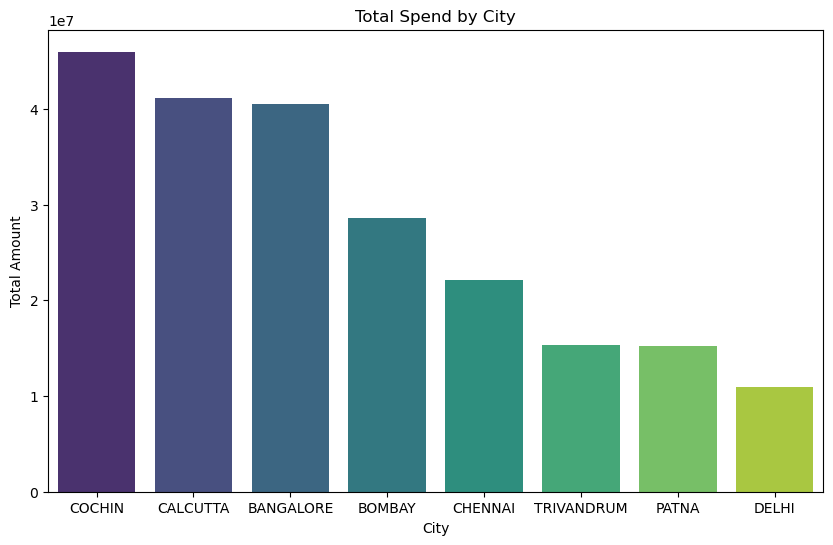

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=city_max_spend.index, y=city_max_spend.values, palette='viridis')
plt.title('Total Spend by City')
plt.xlabel('City')
plt.ylabel('Total Amount')
plt.show()

In [25]:
# h. Which age group is spending more money?

customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13


In [52]:
max_group = customer_spend.groupby(by='Segment')['Amount'].sum().sort_values(ascending=False)

max_group

Segment
Normal Salary    58282187.02
Self Employed    47841346.19
Salaried_Pvt     45046040.79
Govt             34867160.16
Salaried_MNC     33744351.07
Name: Amount, dtype: float64

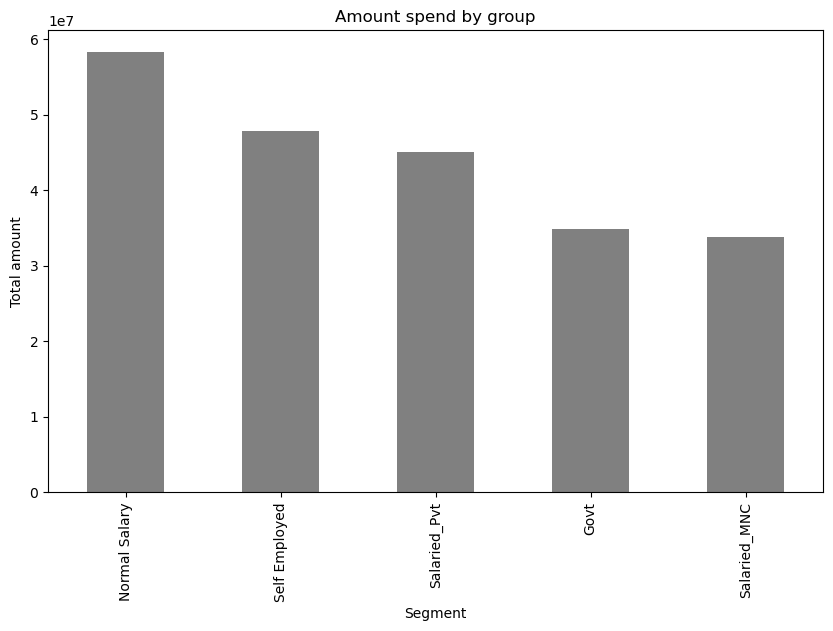

In [27]:
plt.figure(figsize = (10,6))
max_group.plot(kind='bar',color='grey')
plt.ylabel('Total amount')
plt.title('Amount spend by group')
plt.show()



In [53]:
# i. Who are the top 10 customers in terms of repayment?

top_10 = repayment.groupby(by='Customer')['Amount'].sum().sort_values(ascending= False).head(10)

top_10

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A22     9372561.68
A21     9056336.15
A43     8489871.46
A45     8448334.87
A12     8334760.16
A48     8292416.75
A14     7943268.63
Name: Amount, dtype: float64

#### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [61]:
customer_spend['year'] =  customer_spend['Month'].dt.year

In [62]:
city_cust_spend = pd.pivot_table(customer_spend,index=['City','year'],columns='Product',
                                 values='Amount',aggfunc='sum')
city_cust_spend

Product                 Gold    Platimum      Silver
City       year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

[]

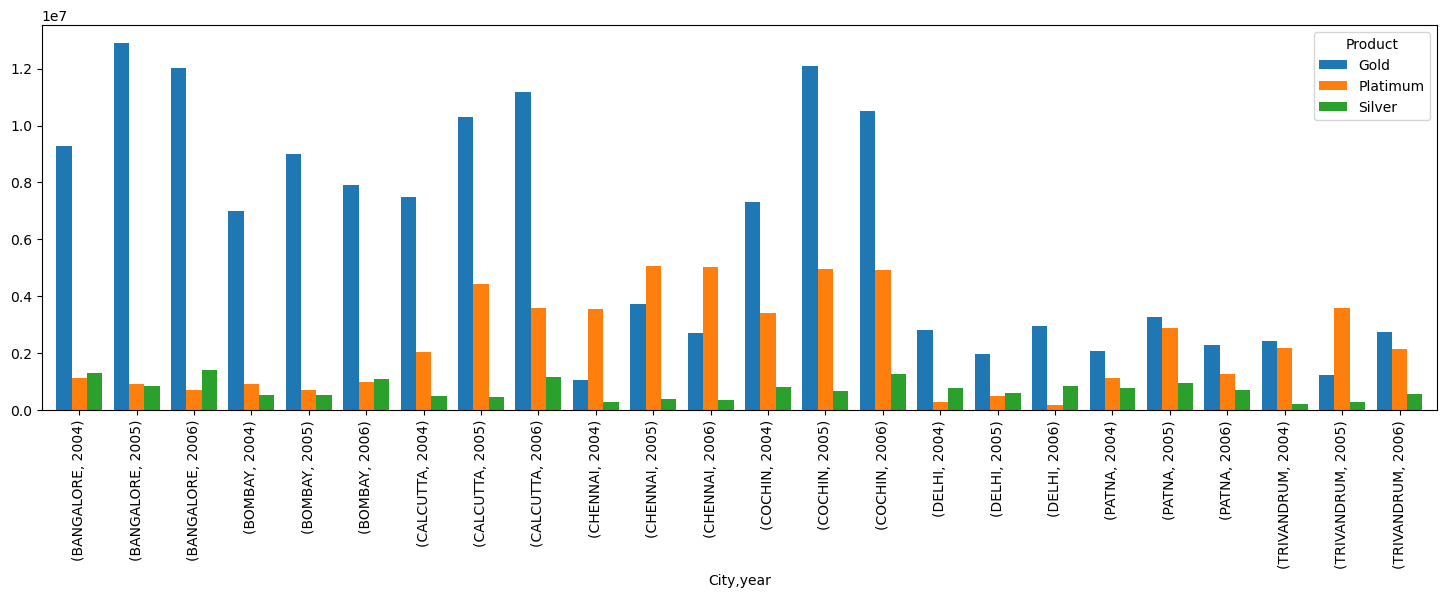

In [64]:

city_cust_spend.plot(kind='bar',figsize=(18,5),width=0.8)
plt.plot()

## 4. Create graphs for
 #### a. Monthly comparison of total spends, city wise
 #### b. Comparison of yearly spend on air tickets
 #### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [68]:
# a. Monthly comparison of total spends, city wise

customer_spend['Month'] = pd.to_datetime(customer_spend['Month'])
customer_spend['monthly'] = customer_spend['Month'].dt.strftime('%B')
customer_spend['yearly'] = customer_spend['Month'].dt.strftime('%Y')


month_city =pd.pivot_table(data=customer_spend,values='Amount',index='City',columns='monthly',aggfunc='sum')
month_city

monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


In [ ]:
month_city.plot(kind='bar',figsize=(12,6),width=0.8)
plt.show()

In [69]:
#(b) Comparison of yearly spend on air tickets
filtered_type =customer_spend[customer_spend.loc[:,'Type']=='AIR TICKET']

air_ticket_spend = pd.pivot_table(data=filtered_type,index='yearly',values='Amount',
                                                 aggfunc='sum').sort_values(by='Amount',ascending=False)
air_ticket_spend


,Amount
yearly,
2005,10550152.21
2006,5248469.56
2004,4357225.35


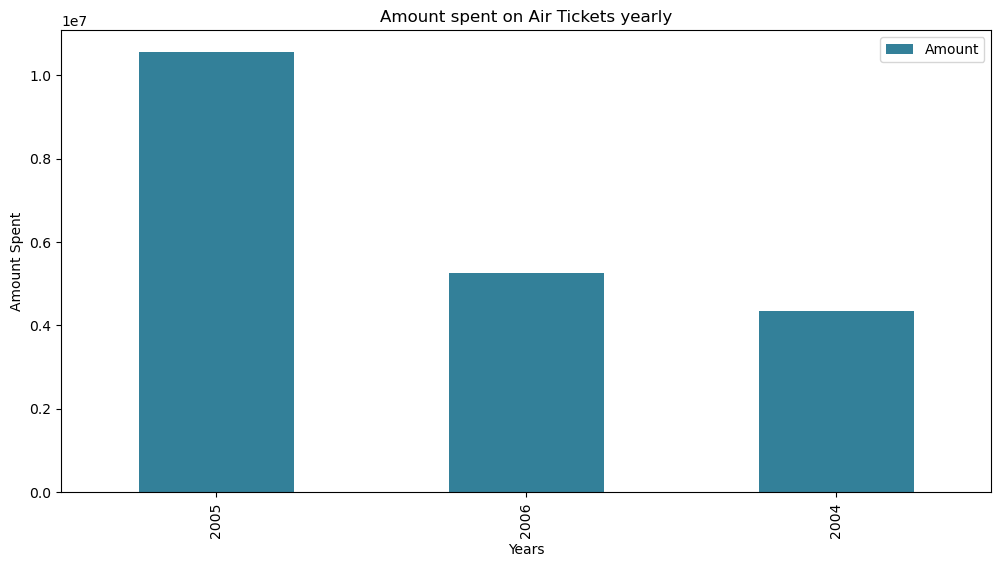

In [70]:
air_ticket_spend.plot(kind='bar',figsize=(12,6),color=(0.2, 0.5, 0.6))
plt.ylabel('Amount Spent')
plt.xlabel('Years')
plt.title('Amount spent on Air Tickets yearly')
plt.show()

#### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)


In [74]:
product_wise = pd.pivot_table(data=customer_spend,index='Product',columns='monthly',values='Amount'
                                                                                     ,aggfunc='sum')  

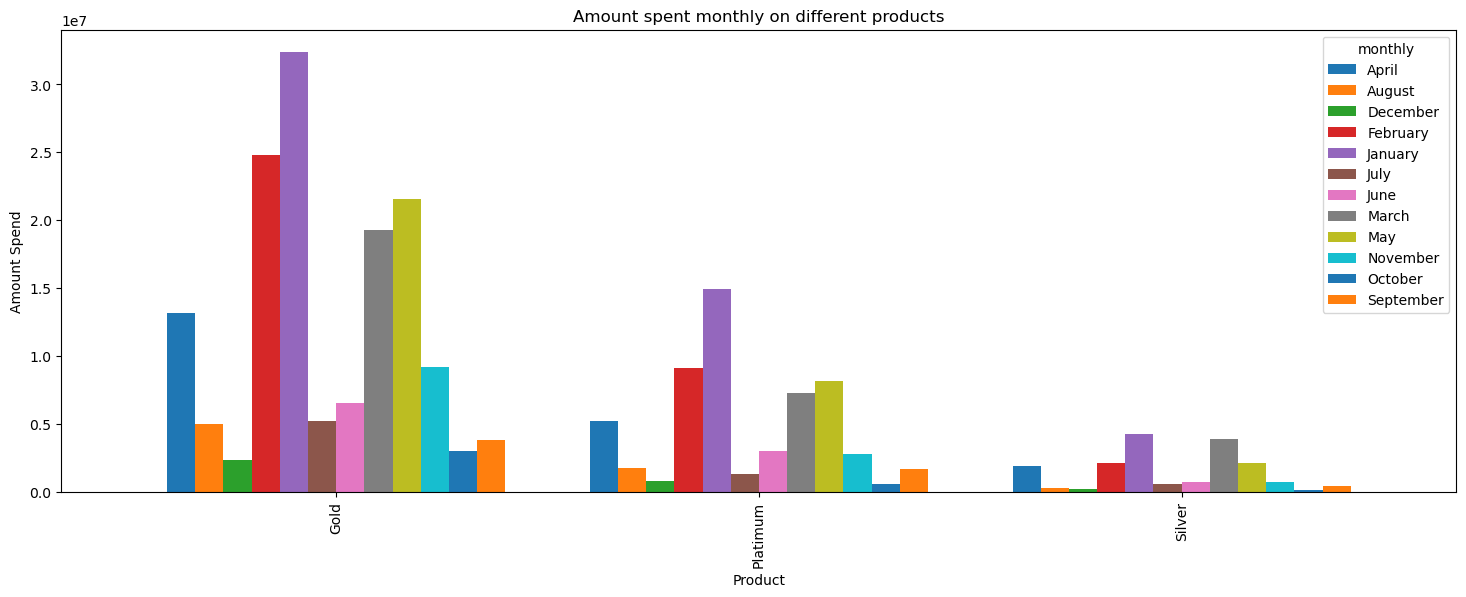

In [75]:
product_wise.plot(kind="bar",figsize=(18,6),width=0.8)
plt.ylabel("Amount Spend")
plt.title("Amount spent monthly on different products")
plt.show()

#### (5) Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [79]:
customer_repay['Month'] = pd.to_datetime(customer_repay['Month'])


In [80]:
customer_repay['Monthly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
customer_repay['Yearly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [81]:
def summary_report(product,timeperiod):
    print('Give the product name and timeperiod for which you want the data')
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result

In [82]:
summary_report('gold','monthly')

Give the product name and timeperiod for which you want the data


Monthly                           April     August   December    February  \
Product City       Customer                                                 
Gold    BANGALORE  A1         508949.16        NaN        NaN   781873.80   
                   A13        494392.40  873304.51        NaN  2049808.15   
                   A14        812582.20  198623.13  388821.96  1482923.34   
                   A30        425694.16        NaN        NaN  1321469.80   
                   A43        612541.80        NaN        NaN   763846.93   
                   A63              NaN        NaN        NaN         NaN   
                   A81              NaN        NaN        NaN         NaN   
                   A88              NaN        NaN        NaN         NaN   
                   A92        459105.69        NaN        NaN         NaN   
        COCHIN     A11        958466.08  332677.61        NaN  1069789.26   
                   A16        338710.86        NaN        NaN   331143.85   
                   A32        333042.82   99528.43        NaN   851127.91   
                   A45       1435443.21  431769.44  410935.52  1241580.90   
                   A61       3412860.60  197804.13        NaN  1345911.54   
                   A65              NaN        NaN        NaN         NaN   
                   A90        109931.32        NaN        NaN         NaN   
                   A94              NaN        NaN        NaN         NaN   
        CALCUTTA   A10        478747.41        NaN        NaN   652033.51   
                   A15              NaN   17981.25        NaN   516544.51   
                   A29              NaN  534103.41        NaN   627147.67   
                   A31         13054.67        NaN        NaN   962656.24   
                   A60       2397565.91  735660.40        NaN  1403731.08   
                   A89        497237.97        NaN        NaN         NaN   
        BOMBAY     A12        601326.07  120471.17        NaN  1978117.59   
                   A17        391463.29   98341.04  479227.30   374865.01   
                   A42        173199.87        NaN        NaN   476213.23   
                   A62       1115760.01        NaN        NaN   478764.07   
                   A91        247781.00        NaN        NaN         NaN   
        CHENNAI    A27        379529.81  472123.57  136860.63   841114.02   
                   A67              NaN        NaN        NaN         NaN   
        TRIVANDRUM A28        115326.71  437823.07  451630.26   968709.79   
        PATNA      A26        558432.60  398164.37  417177.67  1298000.32   
                   A66              NaN        NaN        NaN         NaN   
                   A95              NaN        NaN        NaN         NaN   
        DELHI      A44        346650.76  539494.72   79696.21   745752.19   
                   A64              NaN        NaN  212614.48         NaN   
                   A82              NaN        NaN        NaN         NaN   
                   A93              NaN        NaN        NaN         NaN   

Monthly                         January        July       June       March  \
Product City       Customer                                                  
Gold    BANGALORE  A1        2407806.29   297176.74        NaN         NaN   
                   A13       2014186.98   424603.55  837101.91  1183569.05   
                   A14        993114.87    41962.19   41128.98  1682886.51   
                   A30        608066.49         NaN   72609.24   599331.38   
                   A43       1978038.15   803935.53   23525.91  1378774.72   
                   A63        372179.26         NaN        NaN         NaN   
                   A81              NaN         NaN        NaN   207780.32   
                   A88              NaN         NaN        NaN   146821.30   
                   A92              NaN         NaN        NaN         NaN   
        COCHIN     A11        958556.39   128484.37        Na